In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load dataset
# df = pd.read_csv("/mnt/data/Fraud.csv") # Original line - file not found
# Please replace "YOUR_FILE_PATH_HERE" with the correct path to your Fraud.csv file
df = pd.read_csv("/content/Fraud.csv") # Assuming file is uploaded to Colab's content directory

# First 5 rows
df.head()
# Check shape
df.shape
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,1


In [ ]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


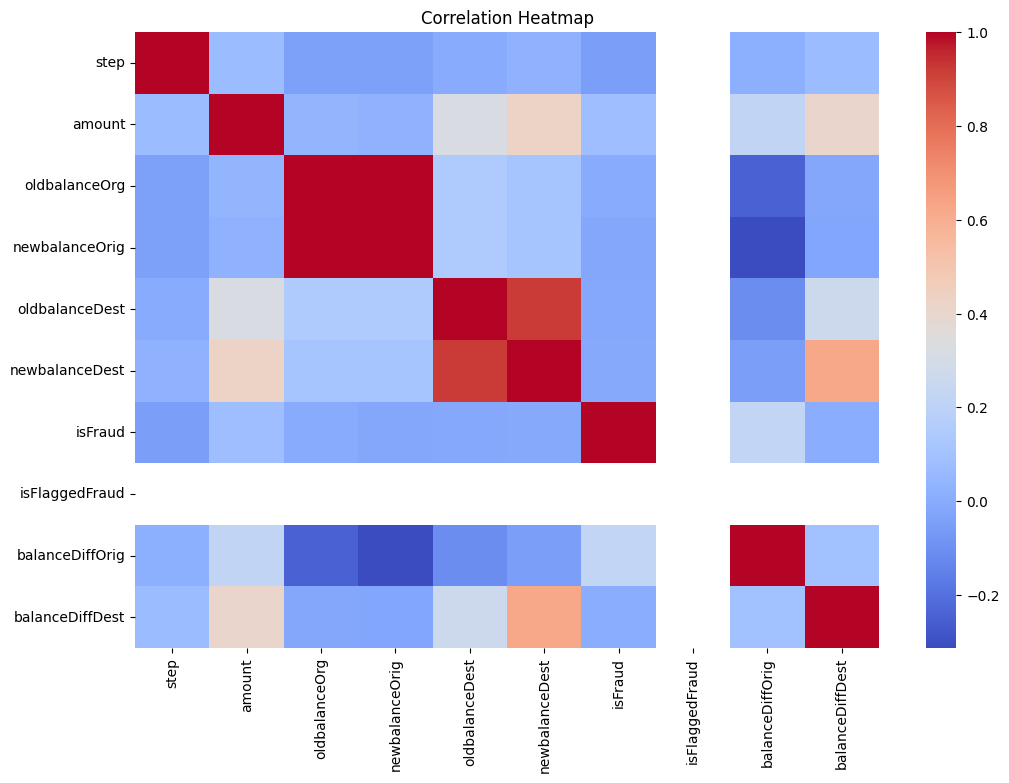

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_cleaned = df.dropna(subset=['isFraud'])
X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

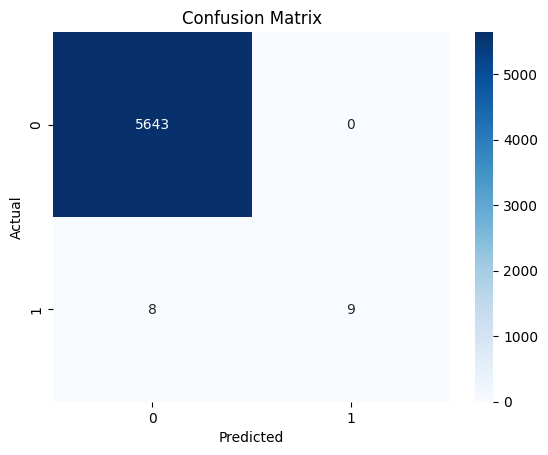

In [ ]:
# Preprocessing X_train and X_test
# Make copies to avoid modifying the original split dataframes
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Drop 'nameOrig', 'nameDest', and 'isFlaggedFraud' columns as they are not suitable for direct use in the model
# 'isFlaggedFraud' might also be a target-related variable, potentially causing data leakage or being redundant.
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']

# Check if columns exist before dropping
for col in columns_to_drop:
    if col in X_train_processed.columns:
        X_train_processed = X_train_processed.drop(columns=[col])
    if col in X_test_processed.columns:
        X_test_processed = X_test_processed.drop(columns=[col])

# Apply Label Encoding to the 'type' column
le = LabelEncoder()
X_train_processed['type'] = le.fit_transform(X_train_processed['type'])
X_test_processed['type'] = le.transform(X_test_processed['type'])

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Now, the original confusion matrix code can run
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_prob = model.predict_proba(X_test_processed)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9685607363625939


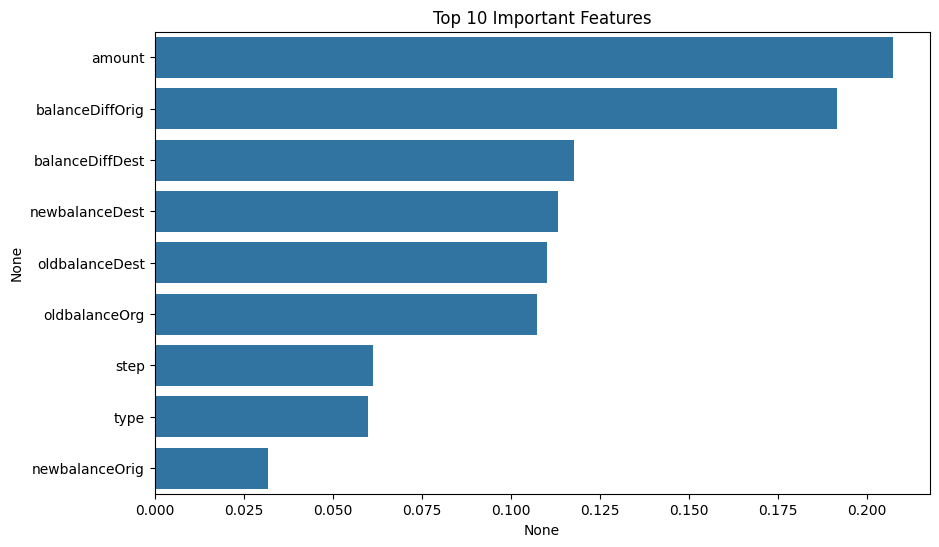

,0
amount,0.207263
balanceDiffOrig,0.191569
balanceDiffDest,0.117620
newbalanceDest,0.113174
oldbalanceDest,0.110086
oldbalanceOrg,0.107483
step,0.061216
type,0.059773
newbalanceOrig,0.031816


In [ ]:
importance = pd.Series(model.feature_importances_, index=X_train_processed.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance[:10], y=importance[:10].index)
plt.title("Top 10 Important Features")
plt.show()

importance[:10]